### Bror Torstensson - bror23000
  
  
  
  
**Netflix data anlyysi**

- Datana käytössä netflix full dataset, joka sisältää palvelussa olleita tv-sarjoja sekä elokuvia. Datasta löytyy lisäksi arviointi palvelun IMDB:n tietoja. 
- Analyysissä keskitytään elokuva osioihin, sekä niiden IMBD arvointeihin.

In [1]:
#Alustukset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

data_path = "./data/full_netflix_dataset.csv"

# Datasetin osoite: https://www.kaggle.com/datasets/octopusteam/full-netflix-dataset

### Datan esikäsittely

In [2]:
#luodaan tiedostosta dataframe ja tulostetaan se.

netflix_full_df = pd.read_csv(data_path)

netflix_full_df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517695.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1223453.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211879.0,"AD, AE, AG, AL, AO, AT, AZ, BA, BG, BH, BM, BR..."
3,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,444499.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1106519.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."
...,...,...,...,...,...,...,...,...
20191,NaN,tv,NaN,2024.0,NaN,NaN,NaN,"AL, AZ, BA, BG, BY, CY, EE, FR, GF, HU, IT, LT..."
20192,NaN,tv,Drama,2024.0,NaN,NaN,NaN,"AO, CI, CM, CV, GH, GQ, KE, MG, ML, MU, MZ, NE..."
20193,NaN,tv,"Animation, Action & Adventure",2016.0,NaN,NaN,NaN,"FJ, HK, ID, IN, JP, KR, MU, MY, PH, PK, SG, TH..."
20194,NaN,tv,NaN,NaN,NaN,NaN,NaN,"FJ, HK, ID, IN, JP, KR, MU, MY, PH, PK, SG, TH..."


In [3]:
print(netflix_full_df.head())

                                   title   type                     genres  \
0                      The Fifth Element  movie  Action, Adventure, Sci-Fi   
1                      Kill Bill: Vol. 1  movie    Action, Crime, Thriller   
2                                Jarhead  movie      Biography, Drama, War   
3                             Unforgiven  movie             Drama, Western   
4  Eternal Sunshine of the Spotless Mind  movie     Drama, Romance, Sci-Fi   

   releaseYear     imdbId  imdbAverageRating  imdbNumVotes  \
0       1997.0  tt0119116                7.6      517695.0   
1       2003.0  tt0266697                8.2     1223453.0   
2       2005.0  tt0418763                7.0      211879.0   
3       1992.0  tt0105695                8.2      444499.0   
4       2004.0  tt0338013                8.3     1106519.0   

                                  availableCountries  
0                                         AT, CH, DE  
1  AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, C

In [4]:
print(netflix_full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               19682 non-null  object 
 1   type                20196 non-null  object 
 2   genres              19928 non-null  object 
 3   releaseYear         20181 non-null  float64
 4   imdbId              18887 non-null  object 
 5   imdbAverageRating   18734 non-null  float64
 6   imdbNumVotes        18734 non-null  float64
 7   availableCountries  20196 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.2+ MB
None


**Esikäsittelyn yhteenveto**

Datasetissa on yhteensä **20 196 riviä** ja **8 saraketta**, joista osa sisältää numeerisia (*float64*) ja osa tekstimuotoisia (*object*) arvoja.

**Numerisia sarakkeita (3 kpl):**

- releaseYear (float64)
- imdbAverageRating (float64)
- imdbNumVotes (float64)  

**Tekstimuotoisia sarakkeita (5 kpl):**

- title
- type
- genres
- imdbId
- availableCountries

Kokonaisuutena datasetti on kooltaan riittävän suuri ja rakenne monipuolinen, joten se tarjoaa erinomaisen pohjan jatkoanalyysille ja visualisoinnille.

### Puuttuvat , Päällekäiset sekä Poikkeavat arvot

- Tarkistetaan sisältääkö data *päällekkäisiä* arvoja, sekä suoritetaan niiden poisto.  
  
- Tarkistetaan sisältääkö data *puuttuvia* arvoja.   
Lisäksi lasketaan puuttuvien arvojen prosenttiosuus sekä tehdään tavittavat toimet puuttuville arvoille.

- Tutkitaan `imdbAverageRating` poikkeavat arvot, sekä tehdään tarvittavat toimenpiteet.

In [5]:
# Tarkastetaan päällekäisten arvojen määrä
# myös pelkästään tämä koodi kävisi-> 
# netflix_full_df.duplicated().sum() 

duplicates_count = netflix_full_df.duplicated().sum()
print(f"Päällekkäisiä rivejä: {duplicates_count}")

Päällekkäisiä rivejä: 85


In [6]:
# Esitellään päällekkäiset arvot
netflix_full_df[netflix_full_df.duplicated()]

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
18123,NaN,tv,Reality,2020.0,NaN,NaN,NaN,KR
18212,NaN,tv,Reality,2020.0,NaN,NaN,NaN,KR
18302,NaN,tv,NaN,2021.0,NaN,NaN,NaN,JP
18344,NaN,tv,Reality,2021.0,NaN,NaN,NaN,KR
18367,NaN,tv,Reality,2021.0,NaN,NaN,NaN,KR
...,...,...,...,...,...,...,...,...
20147,NaN,tv,Reality,2024.0,NaN,NaN,NaN,KR
20151,NaN,tv,Reality,2024.0,NaN,NaN,NaN,KR
20172,NaN,tv,NaN,2024.0,NaN,NaN,NaN,JP
20174,NaN,tv,Kids,2024.0,NaN,NaN,NaN,KR


In [7]:
#poistetaan 
netflix_full_df.drop_duplicates()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517695.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1223453.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211879.0,"AD, AE, AG, AL, AO, AT, AZ, BA, BG, BH, BM, BR..."
3,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,444499.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1106519.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."
...,...,...,...,...,...,...,...,...
20191,NaN,tv,NaN,2024.0,NaN,NaN,NaN,"AL, AZ, BA, BG, BY, CY, EE, FR, GF, HU, IT, LT..."
20192,NaN,tv,Drama,2024.0,NaN,NaN,NaN,"AO, CI, CM, CV, GH, GQ, KE, MG, ML, MU, MZ, NE..."
20193,NaN,tv,"Animation, Action & Adventure",2016.0,NaN,NaN,NaN,"FJ, HK, ID, IN, JP, KR, MU, MY, PH, PK, SG, TH..."
20194,NaN,tv,NaN,NaN,NaN,NaN,NaN,"FJ, HK, ID, IN, JP, KR, MU, MY, PH, PK, SG, TH..."


### Päällekäiset arvot

**Yhteenveto:**  
Datassa havaittiin **85** päällekkäistä riviä, joissa jokaisessa oli pelkästään NaN-arvoja. Nämä rivit poistettiin, jotta analyysi pysyisi selkeänä eikä sisältäisi ei-informatiivista tietoa. Tämän jälkeen datassa on **20111** riviä × 8 saraketta, ja verrattuna alkuperäiseen dataan lukema on oikein.

In [8]:
#Tarkastetaan puuttuvat arvot
netflix_full_df.isnull().sum()



title                  514
type                     0
genres                 268
releaseYear             15
imdbId                1309
imdbAverageRating     1462
imdbNumVotes          1462
availableCountries       0
dtype: int64

In [9]:
#Tarkastetaan puuttuvien arvojen prosenttiosuus
missing_values = netflix_full_df.isnull().sum()
missing_percent = (missing_values / netflix_full_df.shape[0]) * 100
print(missing_percent)

title                 2.545058
type                  0.000000
genres                1.326995
releaseYear           0.074272
imdbId                6.481481
imdbAverageRating     7.239057
imdbNumVotes          7.239057
availableCountries    0.000000
dtype: float64


In [10]:
# Poistetaan puuttuvat tiedot
netflix_df = netflix_full_df.dropna()
# Tarkista datan koko puhdistamisen jälkeen
print("Datan koko puhdistamisen jälkeen:", netflix_df.shape)

Datan koko puhdistamisen jälkeen: (18734, 8)


### Puuttuvat arvot

**Analyysin perusteella datasetissä on kahdeksan saraketta, joista kuudessa on puuttuvia arvoja:** 

- `title`: Elokuvan tai sarjan nimi puuttuu 514 tapauksessa, mikä on 2.54% kokonaisarvoista.

- `type`: Sarake on täydellinen, ei puuttuvia arvoja (oletettavasti Movie tai TV Show).  

- `genres`: Genrejä ei ole määritelty 268 rivillä, mikä o 1.32% kokonaisarvosta.

- `releaseYear`: Vain 15 puuttuvaa arvoa, puuttuva osuus on 0.07%.

- `imdbId`: Puuttuu 1309 riviltä; IMDb-tunnisteet puuttvat 6.48%:ssa tapaukista.

- `imdbAverageRating` ja `imdbNumVotes`:  Molemmissa 1462 puuttuvaa arvoa (7.23 %). IMDb-arvioita tai äänimääriä ei ole siis kaikille sisällöille, mikä on jo suhteellisen suuri osuus.  

- `availableCountries`: Ei puuttuvia arvoja; jokaisella rivillä on tieto, missä maissa sisältö on saatavilla.

**Jatkotoimet**  
  
Puuttuvat arvot päätetään poistaa. Näillä puuttuvilla arvoilla ei ole merkittävää vaikutusta tämän analyysin tuloksiin, koska tässä tarkastelussa keskitytään vain olemassa oleviin tietoihin.
  
Jos analyysiä laajennettaisiin, puuttuvien tietojen täydentäminen voisi olla aiheellista. Joidenkin sarakkeiden kohdalla (esimerkiksi `imdbAverageRating` tai `genres`) se voisi kuitenkin olla varsin työlästä tai jopa epäluotettavaa ilman lisäinformaatiota.



### Poikkeavat arvot

In [11]:
#Valitaan imdbAverageRating sarake ja tulostetaan sen tiedot
print(netflix_full_df['imdbAverageRating'].describe())

count    18734.000000
mean         6.399664
std          1.092814
min          1.200000
25%          5.800000
50%          6.500000
75%          7.200000
max          9.500000
Name: imdbAverageRating, dtype: float64


In [12]:
# Määritellään rajat IMDb-arvosanalle
bins = [0, 2, 4, 6, 8, 10]
labels = [
    'Erittäin huono',  # 0–2
    'Huono',           # 2–4
    'Kohtalainen',     # 4–6
    'Hyvä',            # 6–8
    'Erinomainen'      # 8–10
    ]

#Luodaan uusi sarake 'imdb_category' 
netflix_df['imdb_category'] = pd.cut(
    netflix_df['imdbAverageRating'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Tarkistetaan lopputulos
print(netflix_df[['imdbAverageRating', 'imdb_category']].head(10))

   imdbAverageRating imdb_category
0                7.6          Hyvä
1                8.2   Erinomainen
2                7.0          Hyvä
3                8.2   Erinomainen
4                8.3   Erinomainen
5                8.0          Hyvä
6                7.4          Hyvä
7                8.3   Erinomainen
8                7.9          Hyvä
9                7.2          Hyvä


C:\Users\brort\AppData\Local\Temp\ipykernel_23360\2129734583.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['imdb_category'] = pd.cut(


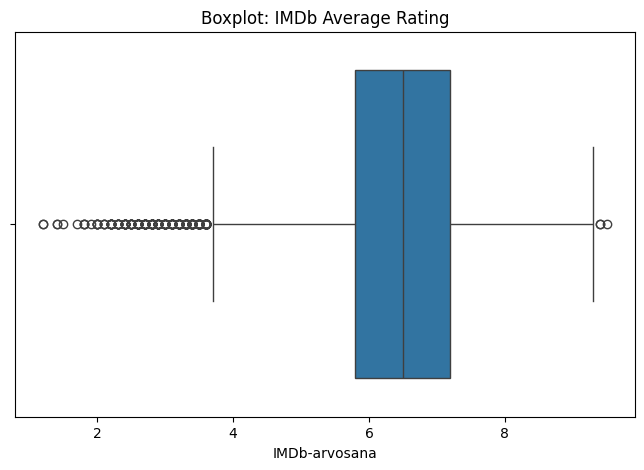

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=netflix_df['imdbAverageRating'])
plt.title("Boxplot: IMDb Average Rating")
plt.xlabel("IMDb-arvosana")
plt.show()

### Poikkeavat arvot

#### Arvosteluasteikon tarkastelu  

`imdbAverageRating` arvot asettuvat välillä 0–10, ja niitä  tarkasteltiin  ``describe()`-metodin avulla. 

Sen perusteella datasetissä:  

Keskiarvo: 6.40  
Mediaani: 6.50  
Pienin arvo: 1.20  
Suurin arvo: 9.50  
Nämä arvot antavat kuvan siitä, mihin IMDb-arvosanat useimmiten asettuvat.


#### Arvon jakaminen luokkiin.

Jotta arvosteluasteikon hajontaa voi tulkita helpommin, `imdbAverageRating` jaettiin viiteen luokkaan (bins). 
Rajat valittiin 0–2, 2–4, 4–6, 6–8 ja 8–10, ja kullekin luokalle annettiin kuvaava nimi:  

- Erittäin huono    # 0–2  
- Huono             # 2–4  
- Kohtalainen       # 4–6  
- Hyvä              # 6–8  
- Erinomainen       # 8–10  

Tämä helpottaa lukijaa ymmärtämään, onko elokuva esimerkiksi “huono” vai “erinomainen” pelkän numeerisen arvon sijaan.  



#### Poikkeavien arvojen tunnistaminen

Poikkeavia arvoja (outliereita) tarkasteltiin boxplotin avulla, joka antaa visuaalisen kuvan arvosanojen jakautumisesta. 

Useimpien elokuvien arvosanat asettuvat välille noin 5,8–7,2. Mediaani, n. 6,4, kuvastaa tyypillistä arvosanaa.  
Arvoja, jotka ovat huomattavasti alle 3,8 tai yli 8, voidaan pitää poikkeavina, mutta tässä yhteydessä ne ovat odotettavia: arvosteluasteikolla on luontevaa, että osa elokuvista saa äärimmäisen matalia tai korkeita pisteitä.  
Tästä syystä näitä arvoja ei poisteta, koska ne ovat aito osa arvosteludataa.

#### Yhteenveto

- IMDb-arvosanat liikkuvat pääasiassa 6–7 pisteen tuntumassa.
- Sanallinen luokkittelu selkeyttää arvosanojen tulkintaa.
- Poikkeavia arvoja ilmenee etenkin hyvin matalissa ja korkeissa pisteissä, mutta niitä ei poisteta, koska ne heijastavat todellisia ääriarvosteluita.  

Kokonaisuudessaan analyysi osoittaa, että IMDb-arvosanojen jakautuminen on keskittynyt lievästi “hyvien” arvosanojen puolelle, mutta datasetissä on sekä heikkoja (1–3) että erinomaisia (8–9,5) suorituksia.  
Tämän kaltaisen datasetin luokittelulla ja boxplotilla saa nopeasti käsityksen sekä elokuvien yleisestä laatutasosta että tyypillisistä poikkeamista.


### Attribuuttityypit ja Perustilastot
 - Tulostetaan data omiin luokkiin binääri, sanallinen tai numeerinen.
 - Luodaan Nubylla perustilastot

In [14]:
atributes_df = netflix_df.copy()  
binary_cols = [
    col for col in atributes_df.columns 
    if atributes_df[col].dropna().nunique() == 2
]


nominal_cols = [
    col for col in atributes_df.select_dtypes(include=['object']).columns
    if atributes_df[col].dropna().nunique() > 2
]

ordinal_cols = atributes_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Binary attributes:", binary_cols)
print("Nominal attributes:", nominal_cols)
print("Ordinal attributes:", ordinal_cols)

Binary attributes: ['type']
Nominal attributes: ['title', 'genres', 'imdbId', 'availableCountries']
Ordinal attributes: ['releaseYear', 'imdbAverageRating', 'imdbNumVotes']


### Attribuuttityypit

**Määritelmät**  
- **Binary (Binäärinen):** Sarake sisältää vain kaksi mahdollista arvoa (esim. 0/1, True/False, Movie/TV Show).  
- **Nominal (Sanallinen):** Tekstipohjainen kategorialuokka, jolla ei ole numeerista järjestystä (esim. genre, title).  
- **Ordinal (Numeerinen):** Lukupohjainen sarake, jolla voi olla järjestettyä tietoa (esim. arvosana asteikolla 1–10 tai julkaisuvuosi). 

**Yhteenveto**  

Data jaettiin attribuuteittain **binäärisiin**, **sanallisiin** ja **numeerisiin** luokkiin.  
Tämä auttaa ymmärtämään, miten kutakin tietoa kannattaa käsitellä.  
Huomaa, että `imdbId` voi näyttää numeeriselta, mutta se on tosiasiassa merkkijonomuotoinen tunniste, jonka arvoissa ei ole järjestystä, joten se tulkitaan nominaaliseksi.  

Allaolevassa taulukossa esitellään mihin luokkaan sarakkeet kuuluvat.

| ***Attribuuttityyppi***      | ***Sarakkeet*** |
| :----:       |    :----:   |
| **Binääriset** (Binary)     | `type`       |
| **Sanalliset** (Nominal)  | `title`, `genres`, `imdbId`, `availableCountries`|
| **Numeeriset** (Ordinal)  | `releaseYear`, `imdbAverageRating`, `imdbNumVotes` |

In [15]:
# Poistetaan puuttuvat arvot varoiksi Nubyn vakauden tähden
ratings = netflix_df['imdbAverageRating'].dropna()  

# Muutetaan sarake NumPy-taulukoksi
arr = ratings.to_numpy()

mean_value = np.mean(arr)
median_value = np.median(arr)
std_value = np.std(arr)
var_value = np.var(arr)
min_value = np.min(arr)
max_value = np.max(arr)
sum_value = np.sum(arr)
product_value = np.prod(arr)


#Tulosteaan 
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_value)
print("Variance:", var_value)
print("Min:", min_value)
print("Max:", max_value)
print("Sum:", sum_value)
print("Product:", product_value)

Mean: 6.399663713035123
Median: 6.5
Standard Deviation: 1.0927849375269187
Variance: 1.1941789196857115
Min: 1.2
Max: 9.5
Sum: 119891.29999999999
Product: inf


c:\Program Files\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


### Perustilastot

**Testin tulos**

- **IMDb-arvosanojen keskiarvo** on noin ***6,40***, mikä viittaa siihen, että suurin osa elokuvista sijoittuu hieman keskitason yläpuolelle.  
- **Mediaani** (***6,50***) on hyvin lähellä keskiarvoa, mikä vahvistaa, että jakauma on melko tasainen keskiarvon ympärillä.  
- **Standardipoikkeama** (n. ***1,09***) ja varianssi (n. ***1,19***) kertovat, että arvosanojen vaihtelu ei ole kovin suurta.  
- **Pienin ja Suurin arvo**  Pienoin arvo on ***1,2*** ja suurin ***9,5***, joten äärimmäisiä huonoja (alle 2) ja erinomaisia (yli 9) elokuvia löytyy.  
- **Summa** (***119 891,3***) on kaikkien arvosanojen yhteenlaskettu tulos.
- **Tulo** ( *product* ) kohdalla esiintyi ylivuoto (arvo ***inf***), mikä on luonnollista suurten arvojen eksponentiaalisen kasvun vuoksi.

**Yhteenveto**  
Analyysin perusteella IMDb-arvosanat jakautuvat melko tasaisesti keskiarvon ympärille, mutta aineistosta löytyy myös muutamia äärimmäisiä huippuarvioita ja matalia pisteitä. Tulo-arvo ei ole käytännöllinen tässä tapauksessa, sillä se kasvaa liian suureksi.


## Analyysi netflix elokuvien tarjonnasta 

- Esikäsitellään data sopivaksi, valitaan tarvittavat arvot.
- Suoritetaan visuaaliset osuudet analyysia varten sekä analysoidaan tulokset.
- Yhteenveto tuloksista

Alustetaan dataa visualisointeja varten.

In [16]:
# Muutetaan 'releaseYear' integer tyyppiseksi
netflix_df['releaseYear'] = netflix_df['releaseYear'].astype(int)

# Tarkistetaan, että muutos onnistui
print(netflix_df['releaseYear'].dtypes)

int64


C:\Users\brort\AppData\Local\Temp\ipykernel_23360\1470491911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['releaseYear'] = netflix_df['releaseYear'].astype(int)


Genre osion pilkkominen käytettävään muotoon

In [17]:
# Pilkotaan genre-sarake ja räjäytetään se
genres_exploded = netflix_df['genres'].dropna().str.split(',').explode()

# Lasketaan jokaisen genren määrä
genre_counts = genres_exploded.value_counts()


In [18]:
# Poistetaan genrestä ylimääräiset välilyönnit
genres_exploded_cleaned = genres_exploded.str.strip()

# Lasketaan uudelleen jokaisen genren määrä
genre_counts_cleaned = genres_exploded_cleaned.value_counts()

genre_counts_cleaned.head()


genres
Drama      9051
Comedy     6886
Action     3330
Crime      2855
Romance    2817
Name: count, dtype: int64

In [19]:
#Suodatus: Jätetään jäljelle rivit joiden type on movie. 
Movies_df = netflix_df[netflix_df['type'] == 'movie']
Movies_df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries,imdb_category
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,tt0119116,7.6,517695.0,"AT, CH, DE",Hyvä
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,tt0266697,8.2,1223453.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM...",Erinomainen
2,Jarhead,movie,"Biography, Drama, War",2005,tt0418763,7.0,211879.0,"AD, AE, AG, AL, AO, AT, AZ, BA, BG, BH, BM, BR...",Hyvä
3,Unforgiven,movie,"Drama, Western",1992,tt0105695,8.2,444499.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO...",Erinomainen
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,tt0338013,8.3,1106519.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG...",Erinomainen
...,...,...,...,...,...,...,...,...,...
15510,It's All Over: The Kiss That Changed Spanish F...,movie,"Documentary, Sport",2024,tt33615797,6.8,426.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE...",Hyvä
15518,Once in a Lifetime,movie,Documentary,2009,tt1520370,7.1,27.0,"AT, DE",Hyvä
15520,Adrienne Iapalucci: The Dark Queen,movie,"Comedy, Documentary",2024,tt33996575,6.6,164.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE...",Hyvä
15529,Nayanthara: Beyond the Fairy Tale,movie,Documentary,2024,tt22297698,4.0,312.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE...",Huono


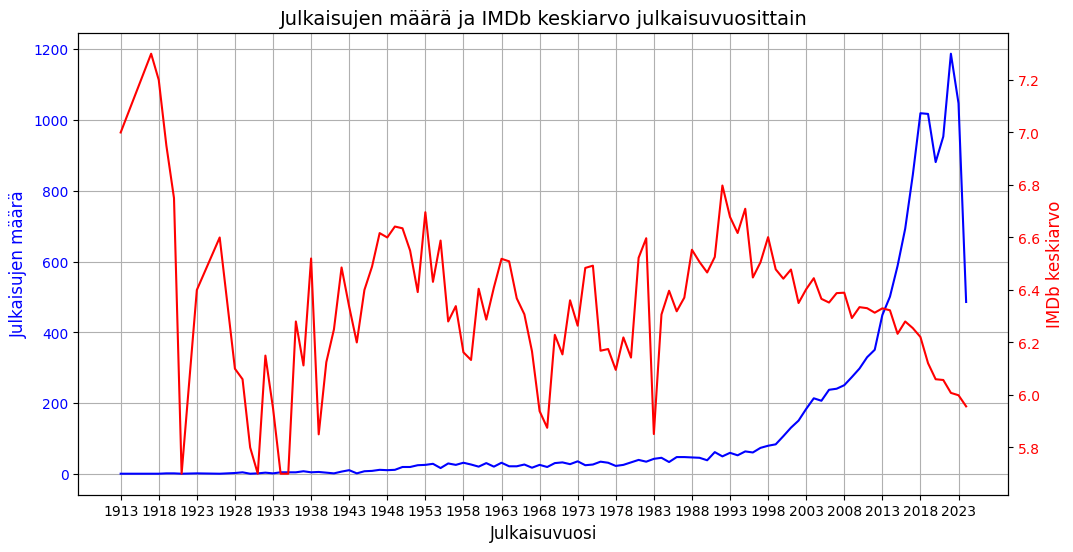

In [20]:
# 1. Viivakaavio


release_year_counts = Movies_df['releaseYear'].value_counts().sort_index()
average_ratings_by_year = Movies_df.groupby('releaseYear')['imdbAverageRating'].mean()


fig, ax1 = plt.subplots(figsize=(12, 6))

# julkaisujen määrä
ax1.set_xlabel('Julkaisuvuosi', fontsize=12)
ax1.set_ylabel('Julkaisujen määrä', color='blue', fontsize=12)
ax1.plot(release_year_counts.index, release_year_counts.values, label='Julkaisujen määrä', color='blue', marker='')
ax1.tick_params(axis='y', labelcolor='blue')

# IMDb-keskiarvo
ax2 = ax1.twinx() 
ax2.set_ylabel('IMDb keskiarvo', color='red', fontsize=12)
ax2.plot(average_ratings_by_year.index, average_ratings_by_year.values, label='IMDb keskiarvo', color='red', marker='')
ax2.tick_params(axis='y', labelcolor='red')


x_ticks = range(release_year_counts.index.min(), release_year_counts.index.max() + 1, 5)
ax1.set_xticks(x_ticks)
plt.xticks(rotation=45)


plt.title('Julkaisujen määrä ja IMDb keskiarvo julkaisuvuosittain', fontsize=14)
ax1.grid(True)


plt.show()

### Viivakaavio vertailu

**Toteutus**

- Kaaviossa esitetään elokuvien julkaisujen määrä ja IMDb-arvosanojen keskiarvo julkaisuvuosittain.
- Sininen viiva `releaseYear` näyttää julkaisujen määrän vuosittain vasemmanpuoleista y-akselia käyttäen.
- Punainen viiva esittää `imdbAverageRating` keskiarvon julkaisuvuosittain oikeanpuoleista y-akselia käyttäen.
- X-akselilla näkyy julkaisuvuodet, jotka kattavat elokuvahistorian.
- Ruudukko ja kaksi erillistä y-akselia (vasen ja oikea) tekevät datan vertailusta selkeämpää.

**Havainnot:**  

- Julkaisujen määrä (sininen viiva):
    - Alkuvuosina, erityisesti ennen 1930-lukua, julkaisumäärät ovat epäsäännöllisiä mutta korkeita, erityisesti 1918-luvulla.
    - Elokuvien määrä pysyy melko tasaisena keskivaiheilla (1940–1980), mutta kasvaa huomattavasti 2000-luvun jälkeen.
    - Huomattava kasvu tapahtuu erityisesti 2010-luvulla, kun elokuvien määrä ylittää 1000 per vuosi.


- IMDb-arvosanojen keskiarvo (punainen viiva):
    - IMDb-arvosanojen keskiarvo on ollut melko korkea 1900-luvun alussa, mutta se on vähentynyt tasaisesti 1930-luvulta alkaen.
    - Nykyisin keskiarvo on asettunut noin 6.0–6.5 tasolle.
    - Elokuvien laadussa näyttäisi tapahtuneen pieniä piikkejä tietyissä vuosikymmenissä (esim. 1940-luvulla ja 2010-luvun alussa).

- **Vertailu:**

    - ***Kasvava elokuvien määrä (sininen):*** Julkaisujen määrä ei näytä olevan suorassa korrelaatiossa IMDb-arvosanojen keskiarvoon. Suurempi määrä elokuvia ei tarkoita korkeampaa keskiarvoa.
    - ***Laskeva IMDb-keskiarvo (punainen):*** Arvosanojen tasainen lasku voi viitata siihen, että suurempi määrä julkaisuja ei aina vastaa elokuvien laadun parantumista.


**Yhteenveto:**  

Kaavio osoittaa selkeän trendin:

- Elokuvien julkaisujen määrä on kasvanut dramaattisesti 2000-luvulla.
- IMDb-arvosanojen keskiarvo on kuitenkin laskenut pitkällä aikavälillä ja tasoittunut nykyisin noin 6.0–6.5:n tasolle.
- Tämä viittaa siihen, että elokuvien määrän kasvu ei välttämättä tarkoita laatutason nousua, vaan saattaa jopa heikentää keskimääräistä laatua. Tämä voisi liittyä suurempaan kaupallistumiseen ja suoratoistopalveluiden nousuun, jotka ovat lisänneet julkaisumäärää.

In [21]:
# Lasketaan vuoden 2018 IMDb-arvosanojen mediaani
median_2018 = netflix_df[netflix_df['releaseYear'] == 2018]['imdbAverageRating'].median()
median_2018

np.float64(6.5)

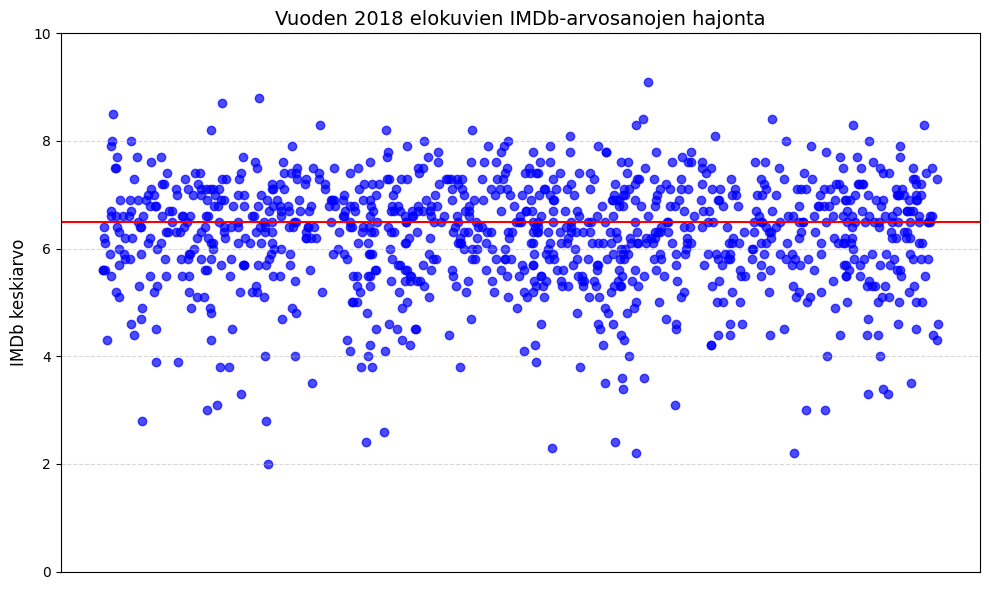

In [22]:
# Hajontakaavio
# Suodatetaan vuoden 2018 julkaisut
movies_2018 = Movies_df[(Movies_df['releaseYear'] == 2018)]

# KÄytetään Jitteriä selkeyttämään hajonta
x_jitter = np.random.uniform(-0.0, 1, size=len(movies_2018))  
x_values = movies_2018['releaseYear'] + x_jitter 


plt.figure(figsize=(10, 6))
plt.scatter(x_values, movies_2018['imdbAverageRating'], color='blue', alpha=0.7)

plt.axhline(y=median_value, color='red', linestyle='-', linewidth=1.5, label=f'Mediaani: {median_value:.2f}')

# Kaavion asetukset
plt.title('Vuoden 2018 elokuvien IMDb-arvosanojen hajonta', fontsize=14)
plt.ylabel('IMDb keskiarvo', fontsize=12)  
plt.ylim(0, 10)  
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks([])
# Näytetään kaavio
plt.tight_layout()
plt.show()

### **Toteutus:**
Visualisointi on hajontakaavio, joka esittää vuoden 2018 elokuvien IMDb-arvosanojen hajontaa. X-akseli on satunnaisesti hajautettu (jotta pisteet eivät mene päällekkäin), ja Y-akseli kuvaa elokuvien IMDb-keskiarvoja. Punainen vaakaviiva edustaa vuoden 2018 elokuvien IMDb-arvosanojen mediaania.



### **Havainnot:**
1. **Hajonta:**
   - Suurin osa arvosanoista sijoittuu välille 4–8.
   - Yksittäisiä poikkeamia on nähtävissä alle 3:n ja yli 8:n arvosanoissa, mutta nämä ovat harvinaisia.

2. **Mediaani:**
   - Punainen viiva osoittaa, että vuoden 2018 elokuvien mediaanin 6,5
   - Tämä vahvistaa, että useimmat elokuvat sijoittuvat keskimääräisen tai sitä hieman korkeamman arvostelutason välille.

3. **Tiheys:**
   - Eniten pisteitä esiintyy alueella 5.5–7, mikä viittaa siihen, että suurin osa vuoden 2018 elokuvista sai kohtalaisia tai hyviä arvioita.



### **Yhteenveto:**
Vuoden 2018 elokuvien IMDb-arvosanat ovat pääosin keskiarvoisia, ja vain harvat elokuvat saavat erittäin matalia tai korkeita arvioita. Tämä viittaa siihen, että elokuvien yleinen laatu ja yleisön arviointitavat ovat tasaisia. Visualisointi auttaa tunnistamaan ääripäitä sekä arvioimaan, kuinka arvioinnit jakautuvat tietyllä aikavälillä.

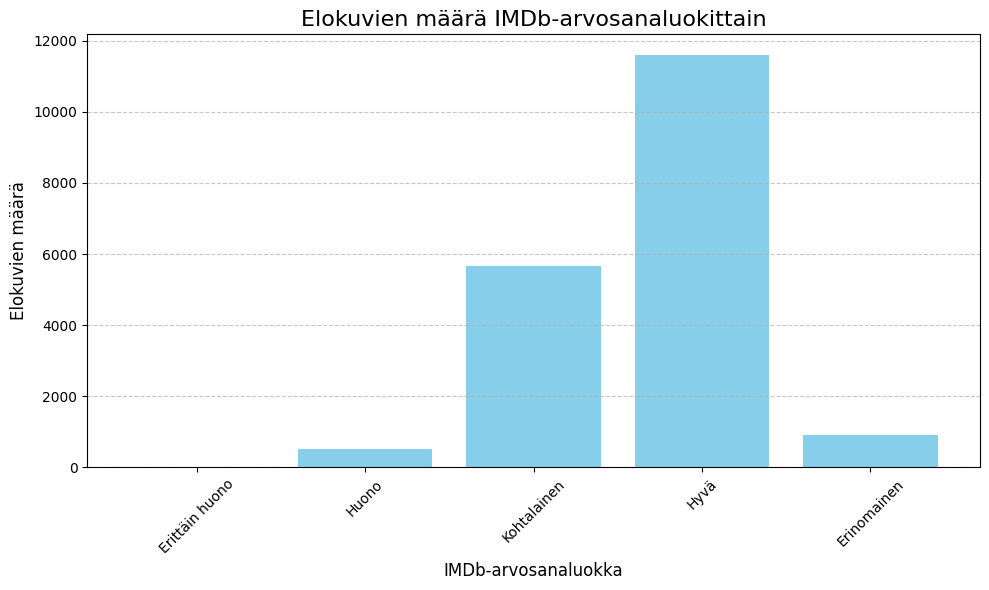

In [23]:
# 3. Pylväsdiagrammi (Bar Chart)

category_counts = netflix_df['imdb_category'].value_counts().sort_index()

# Piirretään pylväsdiagrammi
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', width=0.8)
plt.title("Elokuvien määrä IMDb-arvosanaluokittain", fontsize=16)
plt.xlabel("IMDb-arvosanaluokka", fontsize=12)
plt.ylabel("Elokuvien määrä", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## IMDB arvostelu luokittain
 
### **Toteutus:**
Visualisointi on toteutettu pylväsdiagrammina, joka esittää elokuvien määrän IMDb-arvosanaluokittain.  
Arvosanaluokat on jaettu viiteen kategoriaan:
- Erittäin huono
- Huono
- Kohtalainen
- Hyvä
- Erinomainen

X-akselilla näkyvät IMDb-arvosanaluokat ja Y-akselilla elokuvien lukumäärä kussakin kategoriassa. 



### **Havainnot:**
- **Eniten elokuvia kuuluu luokkaan "Hyvä",** mikä osoittaa, että suurin osa elokuvista saa hyviä arvosteluja IMDb:ssä.
- Luokka "Kohtalainen" on toiseksi yleisin, mutta merkittävästi pienempi kuin "Hyvä".
- **Luokissa "Erittäin huono" ja "Huono" on selvästi vähemmän elokuvia**, mikä viittaa siihen, että huonosti arvostellut elokuvat ovat harvinaisempia.
- **"Erinomainen"-luokka** sisältää hyvin pienen osan elokuvista, mikä saattaa osoittaa, että korkeimmat arvosanat ovat vaikeammin saavutettavissa.



### **Yhteenveto:**
Diagrammi osoittaa, että elokuvat keskittyvät keskimääräiseen tai hyviin IMDb-arvosanoihin, kun taas ääripäiden (erittäin huono ja erinomainen) elokuvia on huomattavasti vähemmän. Tämä voisi viitata siihen, että yleisö on yleensä positiivinen elokuvien arvioinnissa, mutta täydelliset tai erittäin huonot arvosanat ovat poikkeuksellisia. Tämä analyysi voi auttaa ymmärtämään, miten elokuvien laatu jakautuu IMDb:n käyttäjien keskuudessa.

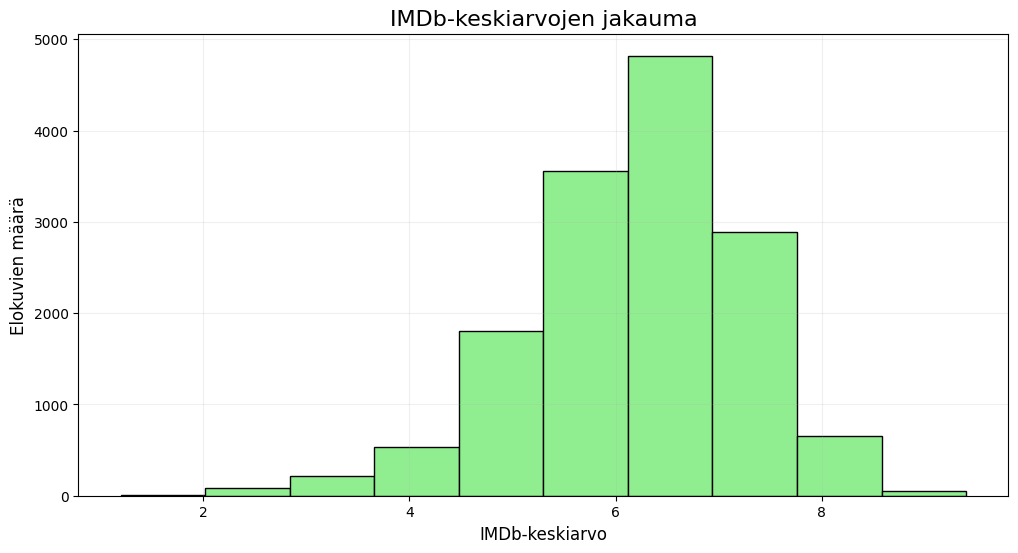

In [24]:
# 4. Histogrammi
# Histogrammi IMDb-keskiarvoista.

plt.figure(figsize=(12, 6))
plt.hist(Movies_df['imdbAverageRating'], bins=10, color='lightgreen', edgecolor='black')

plt.title("IMDb-keskiarvojen jakauma", fontsize=16)
plt.xlabel("IMDb-keskiarvo", fontsize=12)
plt.ylabel("Elokuvien määrä", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

### IMDB arvostelu



### **Toteutus:**
Visualisointi on toteutettu histogrammina, joka kuvaa elokuvien IMDb-keskiarvojen jakaumaa. X-akselilla on elokuvien IMDb-keskiarvot ja Y-akselilla elokuvien lukumäärä. Histogrammi näyttää, kuinka elokuvat jakautuvat eri arvosanaväleille (esim. 2–3, 3–4, jne.).



### **Havainnot:**
- IMDb-arvosanat keskittyvät vahvasti **välille 5–7**, mikä osoittaa, että useimmat elokuvat saavat keskinkertaisia tai hyviä arvosanoja.
- **Arvosanojen huipentuma on noin 6**, jossa on eniten elokuvia.
- **Pienempiä määriä elokuvia löytyy ääripäistä:**
  - Alle 4:n arvosanat ovat harvinaisia.
  - Yli 8:n arvosanat ovat myös huomattavan vähäisiä.



### **Yhteenveto:**
Histogrammi osoittaa, että suurin osa elokuvista sijoittuu keskivälin IMDb-arvosanoihin (5–7). Tämä on linjassa yleisen trendin kanssa, jossa suurin osa elokuvista saa katsojilta melko hyviä mutta ei poikkeuksellisen korkeita arvosanoja. Ääripäiden vähäisyys viittaa siihen, että joko erittäin huonot tai erinomaiset elokuvat ovat harvinaisia. Tämä analyysi voi auttaa ymmärtämään yleisön arviointitottumuksia ja arvosanojen jakautumista elokuvissa.


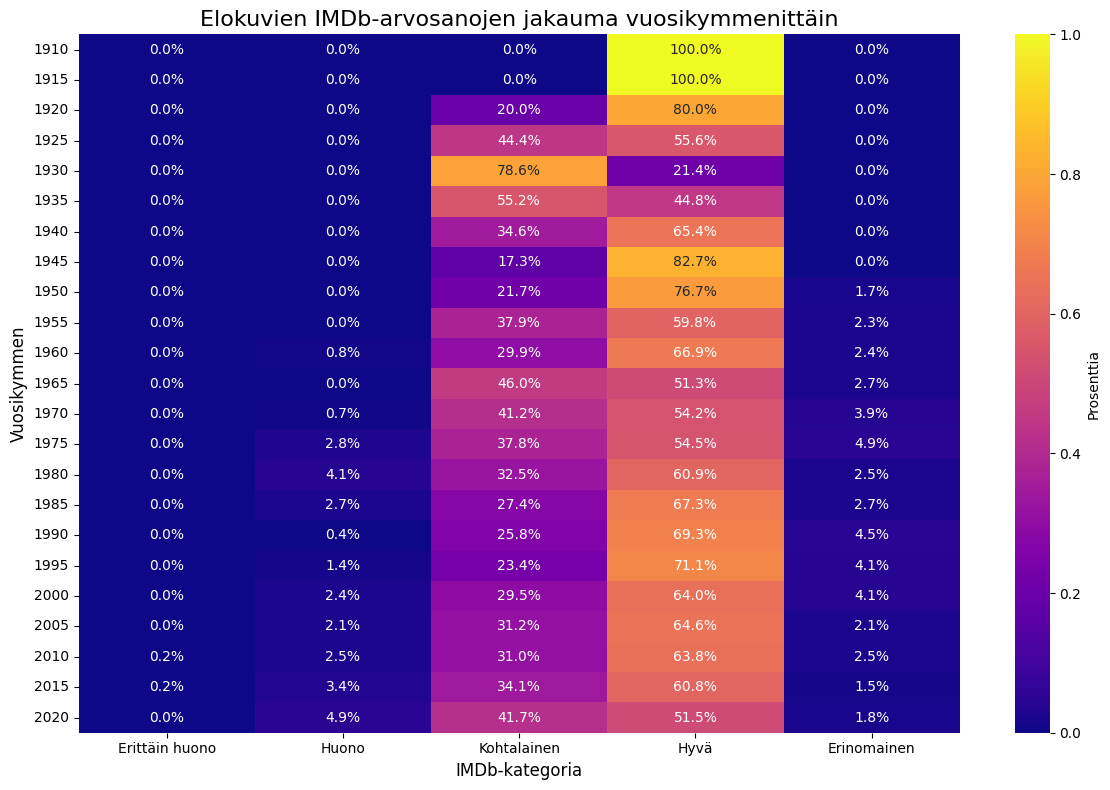

In [25]:
# 5. Heatmap
heatmap_data = pd.crosstab(
    index=(Movies_df['releaseYear'] // 5) * 5,  
    columns=Movies_df['imdb_category'],          
    values=Movies_df['imdbAverageRating'],       
    aggfunc='count',                            
    normalize='index'                            
)

# Piirretään hetmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='plasma', annot=True, fmt='.1%', cbar_kws={'label': 'Prosenttia'})
plt.title("Elokuvien IMDb-arvosanojen jakauma vuosikymmenittäin", fontsize=16)
plt.xlabel("IMDb-kategoria", fontsize=12)
plt.ylabel("Vuosikymmen", fontsize=12)
plt.tight_layout()
plt.show()

### **Toteutus:**
Heatmap-visualisointi näyttää elokuvien IMDb-arvosanojen jakauman vuosikymmenittäin. X-akselilla ovat IMDb-arvosanaluokat (Erittäin huono - Erinomainen), ja Y-akselilla vuosikymmenet (1910-luvulta 2020-luvulle). Värit kuvaavat prosenttiosuutta kunkin vuosikymmenen elokuvista tietyssä IMDb-kategoriassa.



### **Havainnot:**
1. **Vuosikymmenten trendit:**
   - **1920- ja 1930-luvulla:** Lähes kaikki elokuvat kuuluvat luokkiin "Kohtalainen" ja "Hyvä". Tämä saattaa johtua ajan elokuvien yksinkertaisesta rakenteesta tai vähäisistä arviomääristä.
   - **1940–1970-luvut:** Arvostelujen jakauma alkaa monipuolistua, mutta luokassa "Hyvä" on edelleen eniten elokuvia.
   - **1980–2000-luvut:** Elokuvat alkavat jakautua selkeämmin kaikkiin IMDb-kategorioihin, mutta "Hyvä" säilyy hallitsevana luokkana.
   - **2020-luku:** Prosenttiosuus "Huono"-luokassa kasvaa merkittävästi, mikä voi viitata yleisön tiukempaan arviointiin tai tiettyjen elokuvagenrejen kasvuun.

2. **Ääripäät:**
   - Luokat "Erittäin huono" ja "Erinomainen" pysyvät pienenä osuutena kaikista vuosikymmenistä. Tämä korostaa, että täydelliset tai erittäin huonot arvostelut ovat harvinaisia koko tarkastelujakson aikana.

3. **Kohtalainen ja Hyvä:**
   - "Kohtalainen" ja "Hyvä" dominoivat suurinta osaa vuosikymmenistä, mikä osoittaa, että suurin osa elokuvista saa keskiverto- tai hyvän arvion.



### **Yhteenveto:**
Heatmap osoittaa, että IMDb-arvosanojen jakauma on pysynyt melko vakiona vuosikymmenestä toiseen, mutta erityisesti 2020-luvulla "Huono"-luokan osuus kasvaa. Tämä voisi viitata muutoksiin yleisön arviointitavoissa tai nykyelokuvien laadussa. "Kohtalainen" ja "Hyvä" luokat hallitsevat kuitenkin edelleen elokuvien arvosteluja, mikä osoittaa, että suurin osa elokuvista saa yleisesti positiivisia arvioita. Tämä analyysi voi olla hyödyllinen tarkasteltaessa elokuvien arviointien kehitystä ajan myötä.

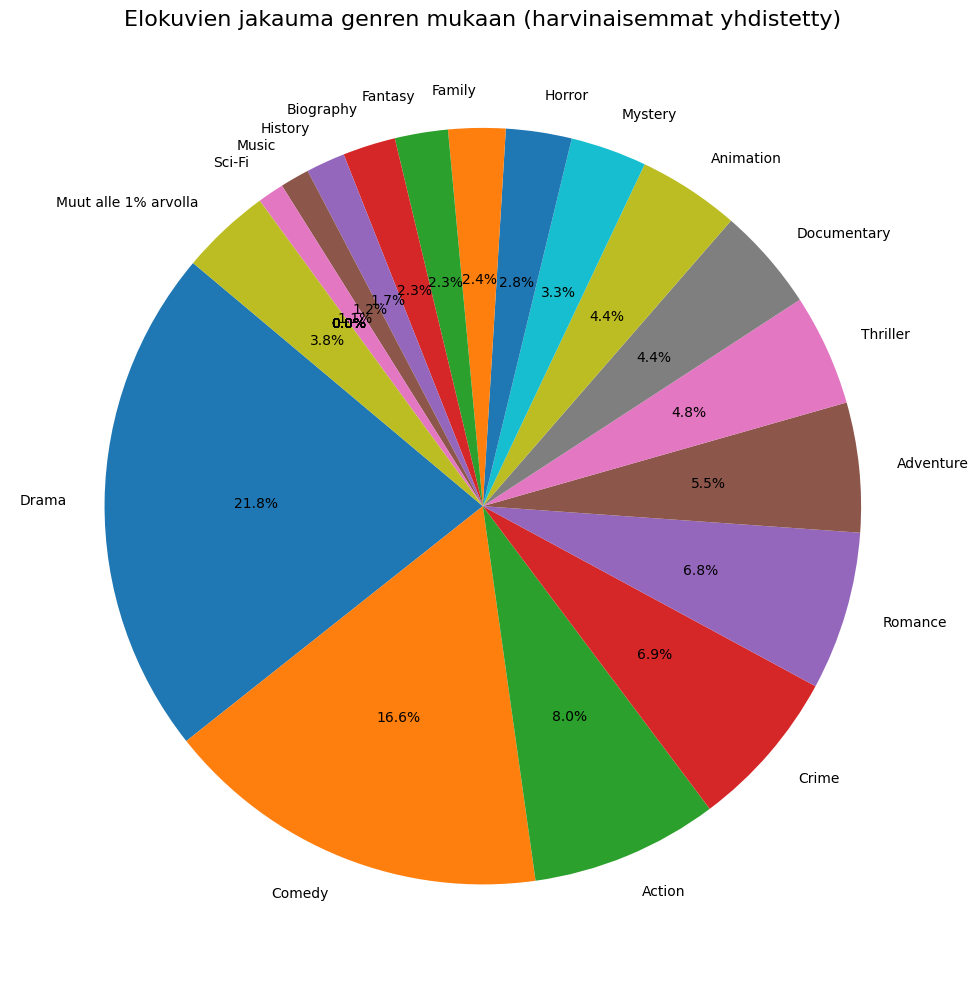

In [26]:
# 6. Ympyrädiagrammi (Pie Chart)

threshold = genre_counts_cleaned.sum() * 0.011  # 1% raja
genre_counts_adjusted = genre_counts_cleaned.copy()
genre_counts_adjusted[genre_counts_adjusted <= threshold] = 0
genre_counts_adjusted['Muut alle 1% arvolla'] = genre_counts_cleaned[genre_counts_cleaned <= threshold].sum()


plt.figure(figsize=(10, 10))
genre_counts_adjusted.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab10.colors,
    legend=False
)
plt.title("Elokuvien jakauma genren mukaan (harvinaisemmat yhdistetty)", fontsize=16)
plt.ylabel("")  
plt.tight_layout()
plt.show()

### **Toteutus:**
Visualisointi on toteutettu ympyrädiagrammina, joka kuvaa elokuvien jakautumista genreittäin.  
Harvinaisemmat genret (alle 1 % osuudella) on yhdistetty kategoriaan **"Muut alle 1 % arvoilla"** selkeyden lisäämiseksi. Tämä tarjoaa yleiskuvan elokuvien genreluokituksen jakaumasta.


### **Havainnot:**
1. **Hallitsevat genret:**
   - **Drama (21.8%)** on selvästi yleisin genre datasetissä.
   - **Comedy (16.6%)** ja **Action (8.0%)** ovat myös erittäin suosittuja.
   - Nämä kolme genreä muodostavat merkittävän osan kaikista elokuvista.

2. **Keskitason genret:**
   - **Romance (6.9%)**, **Crime (6.8%)**, ja **Adventure (5.5%)** seuraavat yleisimpien genrejen joukossa.
   - Nämä genret edustavat keskimäärin suosittuja elokuvalajeja.

3. **Harvinaisemmat genret:**
   - Genrejä, kuten **Horror, Mystery, Family, Fantasy**, on vähemmän, mutta ne ovat edelleen havaittavia.
   - **"Muut alle 1 % arvoilla"** -kategoriassa on yhdistetty genrejä, jotka yksittäin esiintyvät harvemmin.



### **Yhteenveto:**
Tämä ympyrädiagrammi korostaa, kuinka elokuvat keskittyvät muutamaan suosittuun genreen, kuten **Drama, Comedy, ja Action**, kun taas monet muut genret ovat huomattavasti harvinaisempia. Yhdistämällä harvinaisemmat genret yhdeksi kategoriaksi saadaan selkeämpi yleiskuva koko datasta. Tämä analyysi voi auttaa elokuvatuottajia ymmärtämään genretrendejä ja keskittymään yleisön suosimiin elokuvalajeihin.
Huomionarvoista on kuitenkin se, että yksi elokuva voi omata useamman genren kuten datan esittelyssä aikaisemmin tulee esille.

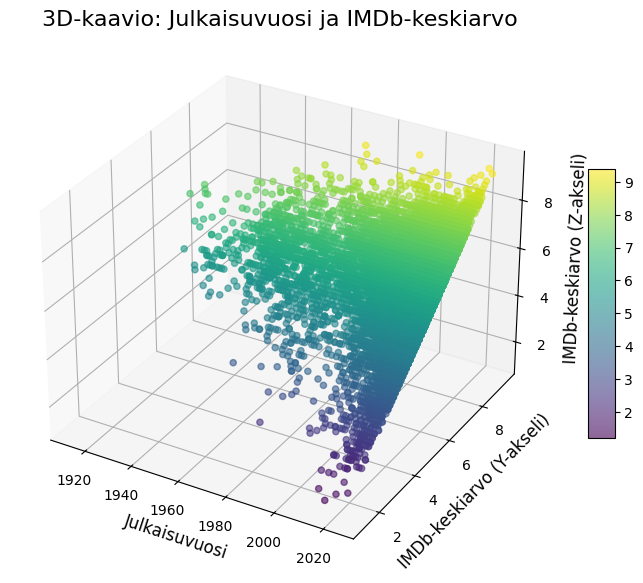

In [27]:
# 7. 3D - visualisointi.

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


x = Movies_df['releaseYear']  
y = Movies_df['imdbAverageRating']  
z = Movies_df['imdbAverageRating']  


sc = ax.scatter(x, y, z, c=y, cmap='viridis', alpha=0.6)


ax.set_title("3D-kaavio: Julkaisuvuosi ja IMDb-keskiarvo", fontsize=16)
ax.set_xlabel("Julkaisuvuosi", fontsize=12)
ax.set_ylabel("IMDb-keskiarvo (Y-akseli)", fontsize=12)
ax.set_zlabel("IMDb-keskiarvo (Z-akseli)", fontsize=12)


fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10)

plt.show()

### **Toteutus:**
Tässä 3D-kaaviossa visualisoidaan elokuvien julkaisuvuosi (X-akseli) suhteessa IMDb-keskiarvoihin (Y- ja Z-akselit). Pisteiden väri kuvaa IMDb-keskiarvoa asteikolla violetti (matala) -> keltainen (korkea). Tämä kaavio auttaa ymmärtämään, miten elokuvien arvioinnit ovat kehittyneet eri aikakausina.



### **Havainnot:**
1. **Ajallinen jakautuminen:**
   - Vanhemmilla elokuvilla (ennen 1960-lukua) IMDb-arvosanat ovat keskittyneet tasaisemmin eri asteikoille, mutta määrällisesti niitä on vähemmän.
   - Uudemmat elokuvat (2000-luvulta lähtien) keskittyvät hieman korkeampiin IMDb-arvosanoihin, mikä voi viitata yleisön arviointikäyttäytymisen muutokseen tai tuotantotasojen paranemiseen.

2. **IMDb-arvioiden jakauma:**
   - Useimmat elokuvat sijoittuvat arvosanoille 4–7, riippumatta julkaisuvuodesta.
   - Korkeammat arvosanat (8–9) ovat harvinaisempia ja näkyvät yksittäisinä pisteinä erityisesti uudemmissa elokuvissa.

3. **Värien jakauma:**
   - Värigradientti korostaa, että matalammat IMDb-arvosanat (violetti) ovat yleisempiä varhaisissa elokuvissa, kun taas korkeat arvosanat (keltainen) korostuvat myöhemmin.



### **Yhteenveto:**
Kaavio osoittaa, että elokuvien IMDb-arvosanat ovat keskimäärin parantuneet ajan myötä, vaikka suurin osa elokuvista sijoittuu edelleen keskivaiheille (arvosanat 4–7). Tämä saattaa viitata tuotannon laadun paranemiseen tai modernien elokuvien yleisön suosiin. Kaavio on hyödyllinen tarkasteltaessa ajallisia trendejä ja arviointien kehitystä.

## Chi2 Testi

Chi-neliötesti (Chi-squared test) on tilastollinen testi, jota käytetään arvioimaan kahden kategorisen muuttujan välistä riippuvuutta. Testin avulla voidaan selvittää, eroavatko havaitut arvot odotetuista arvoista riittävän paljon, jotta niiden välillä voidaan todeta olevan tilastollisesti merkitsevää yhteyttä.


P arvo alle 0.05: Riippuvuus on tilastollisesti merkitsevää.  
P arvo yli 0.05: Riippuvuutta ei ole.

In [28]:
from scipy.stats import chi2_contingency

# Suoritetaan Chi-neliötesti suoraan julkaisuvuosien ja IMDb-kategorioiden välillä
contingency_table_simple = pd.crosstab(
    netflix_df['releaseYear'], 
    netflix_df['imdb_category']
)

chi2_simple, p_simple, dof_simple, expected_simple = chi2_contingency(contingency_table_simple)


print("P-arvo:", round(p_simple, 4))



P-arvo: 0.8328


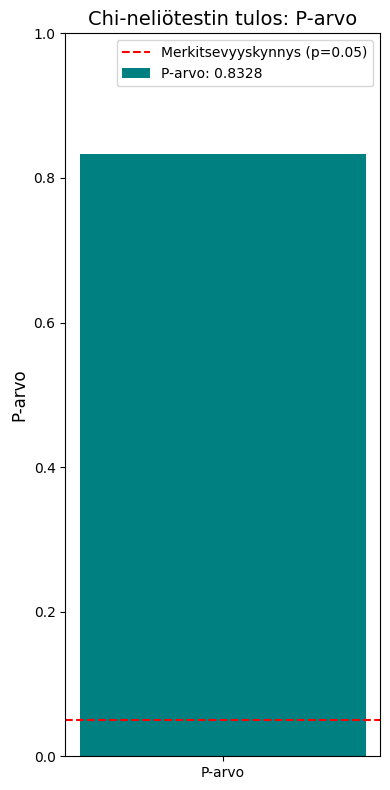

In [29]:
# chi2- testin visualisointi
plt.figure(figsize=(4, 8))


plt.bar(["P-arvo"], [p_simple], color='teal', width=0.4, label=f"P-arvo: {round(p_simple, 4)}")


plt.axhline(0.05, color='red', linestyle='--', label='Merkitsevyyskynnys (p=0.05)')


plt.title("Chi-neliötestin tulos: P-arvo", fontsize=14)
plt.ylabel("P-arvo", fontsize=12)
plt.ylim(0,1.0)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()


### **Toteutus**
- Chi-neliötesti suoritettiin arvioimaan riippuvuutta julkaisuvuosien ja IMDb-kategorioiden välillä.
- Visualisoinnissa esitetään testin **P-arvo** (0.8328) pylväsdiagrammina, ja mukana on myös merkitsevyyskynnys (\(p = 0.05\)) punaisena katkoviivana.
- Y-akseli on rajoitettu arvoon 1.0, jotta P-arvo ja merkitsevyyskynnys voidaan esittää suhteellisella skaalalla.



### **Havainnot**
- P-arvo (\(p = 0.8328\)) on huomattavasti yli merkitsevyyskynnyksen (\(p = 0.05\)).
-  Tämä osoittaa, ettei julkaisuvuosien ja IMDb-kategorioiden välillä ole tilastollisesti merkitsevää riippuvuutta tässä datasetissä.



### **Yhteenveto**
Chi-neliötestin perusteella julkaisuvuosien ja IMDb-kategorioiden välillä ei ole riippuvuutta. Tämä tarkoittaa, että elokuvien julkaisuvuodella ei ole merkittävää vaikutusta siihen, mihin IMDb-kategoriaan ne todennäköisimmin sijoittuvat. Tulokset ovat yhdenmukaisia datasetin tasaisen jakauman kanssa. 
